##### NAME:- SOMYA RANJAN SAHOO

# Numbers Recognition System

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [4]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11490434/11490434 [==============================] - 3s 0us/step


In [5]:
# Build the Neural Network model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

In [7]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_acc}')

313/313 [==============================] - 4s 11ms/step - loss: 2.3144 - accuracy: 0.0486
Test Accuracy: 0.04859999939799309


In [8]:
# Make predictions
predictions = model.predict(test_images)

313/313 [==============================] - 4s 12ms/step


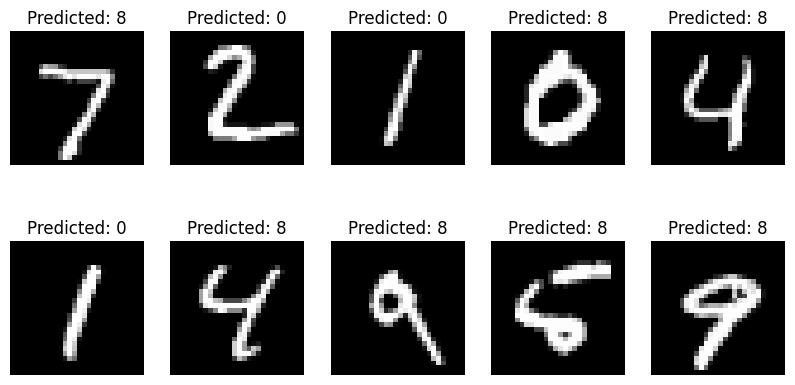

In [9]:
# Plot a few test images and their predictions
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {tf.argmax(predictions[i])}')
    plt.axis('off')
plt.show()